# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Treino e Teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set()

In [3]:
df = pd.read_csv('checkpoint1.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

## Separar em variáveis X e Y

In [6]:
X = df.drop(columns=['mau'], axis=1)
y = df.mau

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [8]:
clf = DecisionTreeClassifier()

In [9]:
clf = clf.fit(X_train,y_train)

[Text(0.6160326586791203, 0.9791666666666666, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = Reprovados'),
 Text(0.36144896671122395, 0.9375, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = Reprovados'),
 Text(0.22478506498247663, 0.8958333333333334, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = Reprovados'),
 Text(0.055355859094176854, 0.8541666666666666, 'educacao_Incomplete higher <= 0.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = Reprovados'),
 Text(0.041696621135873475, 0.8125, 'idade <= 30.137\ngini = 0.084\nsamples = 388\nvalue = [371, 17]\nclass = Reprovados'),
 Text(0.02875629043853343, 0.7708333333333334, 'estado_civil_Single / not married <= 0.5\ngini = 0.071\nsamples = 381\nvalue = [367, 14]\nclass = Reprovados'),
 Text(0.011502516175413372, 0.7291666666666666, 'tempo_emprego <= 0.693\ngini = 0.042\nsamples = 283\nvalue = [277, 6]\nclass = Reprovados'),
 Te

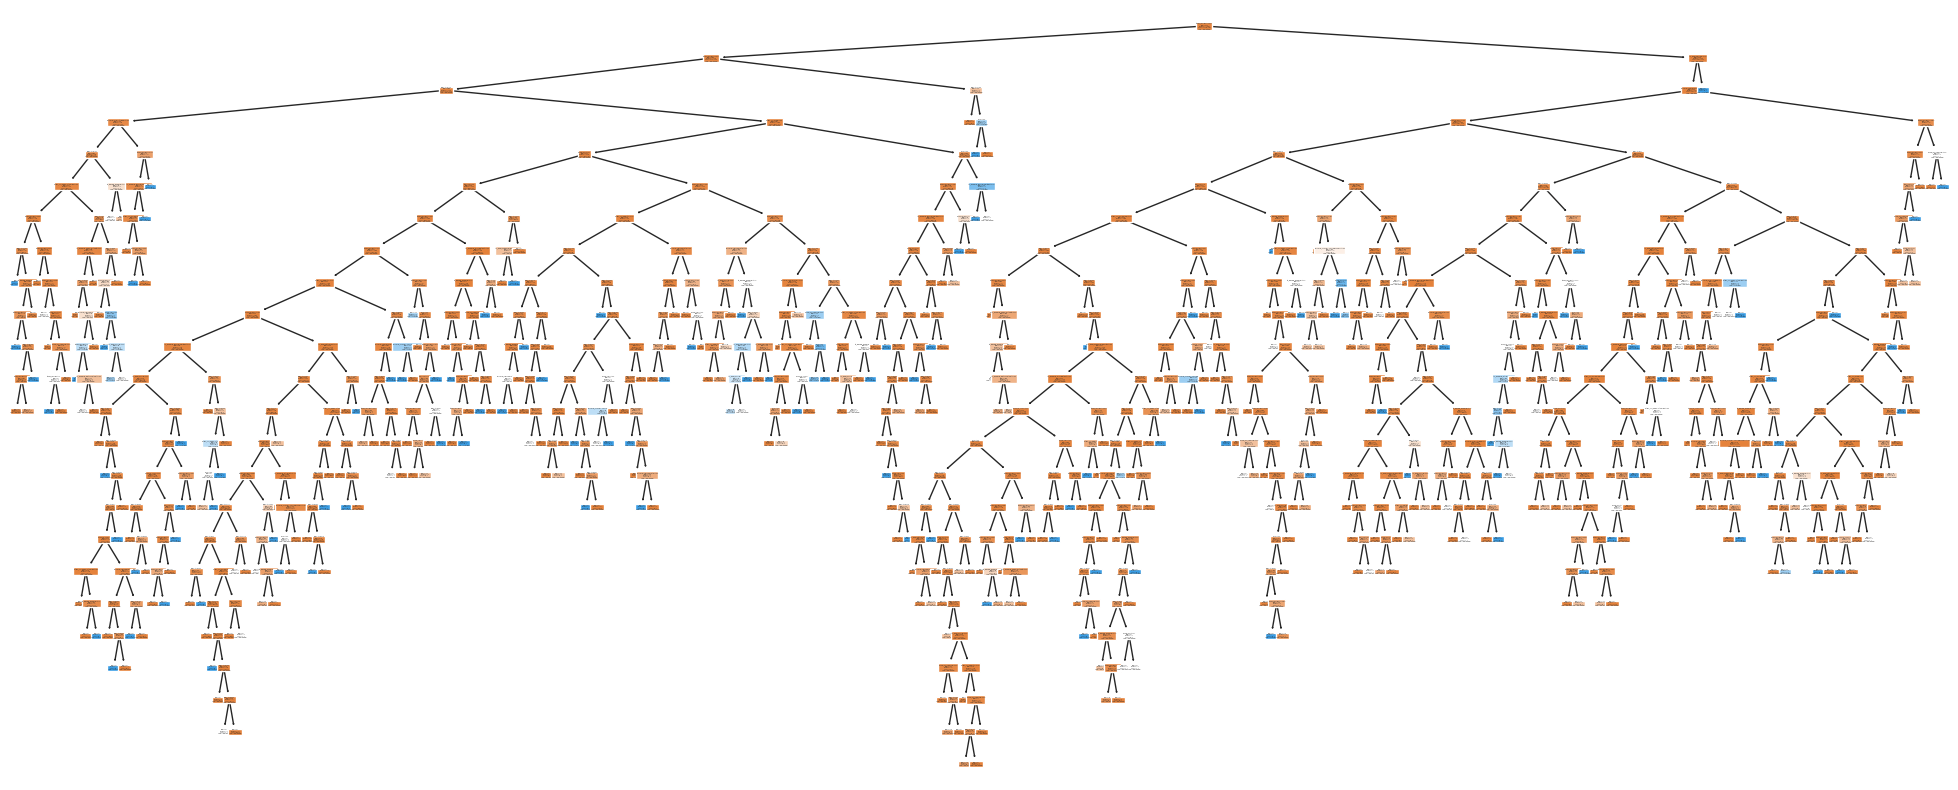

In [31]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
          feature_names=X.columns
         )

In [11]:
predictions = clf.predict(X_test)

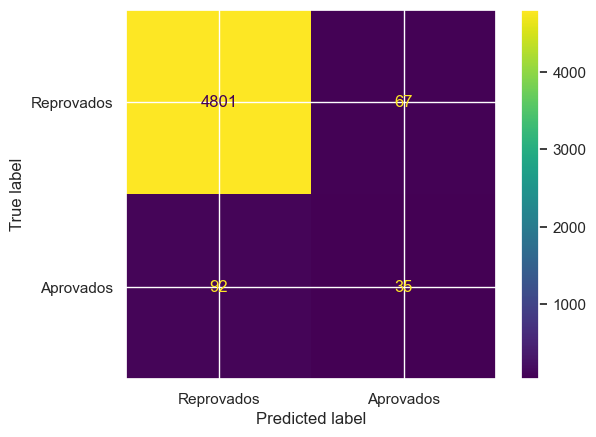

In [30]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Reprovados', 'Aprovados'])

disp.plot()
plt.show()

In [29]:
print(f'{round((accuracy_score(y_test, predictions)*100), 2)} % de acurácia')

96.82 % de acurácia


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?